In [22]:
import pandas as pd
import numpy as np

In [39]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df=pd.read_csv('2013_movies.csv')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
Title                 100 non-null object
Budget                100 non-null float64
DomesticTotalGross    100 non-null float64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
ConstantTerm          100 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.3+ KB


In [60]:
df.Budget[df.Budget.isnull()]=df.Budget.mean()

/Users/pinkyjohar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
df.Budget.value_counts

<bound method IndexOpsMixin.value_counts of 0     1.300000e+08
1     2.000000e+08
2     1.500000e+08
3     7.600000e+07
4     2.250000e+08
5     1.000000e+08
6     7.474719e+07
7     7.474719e+07
8     1.600000e+08
9     2.150000e+08
10    1.900000e+08
11    1.700000e+08
12    1.900000e+08
13    1.350000e+08
14    4.300000e+07
15    3.700000e+07
16    4.000000e+07
17    1.050000e+08
18    2.000000e+07
19    3.500000e+07
20    8.000000e+07
21    1.200000e+08
22    5.000000e+07
23    4.000000e+07
24    1.300000e+08
25    7.800000e+07
26    7.500000e+07
27    1.000000e+08
28    3.000000e+07
29    1.030000e+08
          ...     
70    6.000000e+07
71    1.000000e+07
72    5.800000e+07
73    7.474719e+07
74    7.474719e+07
75    3.800000e+07
76    2.500000e+06
77    1.750000e+08
78    7.474719e+07
79    1.200000e+07
80    3.000000e+07
81    8.000000e+07
82    3.000000e+07
83    7.474719e+07
84    1.300000e+08
85    7.474719e+07
86    7.474719e+07
87    7.474719e+07
88    2.000000e+07
89    

In [57]:
# to check outliers:
#check quantile
q=df['Budget'].quantile(0.99)

#and then filter with:
df[df['Budget']>q]

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ConstantTerm
4,Man of Steel,225000000.0,291045518.0,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1


In [58]:
df.Budget.mean()

74747191.01123595

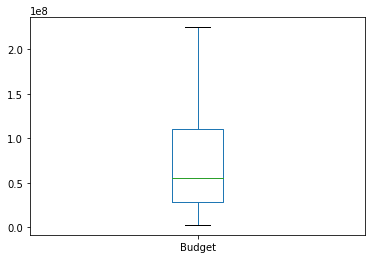

In [59]:
df['Budget'].plot.box()

In [63]:
df.Director

0               Francis Lawrence
1                    Shane Black
2         Chris BuckJennifer Lee
3      Pierre CoffinChris Renaud
4                    Zack Snyder
5                 Alfonso Cuaron
6                    Dan Scanlon
7                  Peter Jackson
8                     Justin Lin
9                      Sam Raimi
10                   J.J. Abrams
11                   Alan Taylor
12                  Marc Forster
13    Kirk De MiccoChris Sanders
14                     Paul Feig
15       Rawson Marshall Thurber
16              David O. Russell
17                  Baz Luhrmann
18                     James Wan
19                   Seth Gordon
20                  Dennis Dugan
21                 James Mangold
22                    Adam McKay
23                    Peter Berg
24                       Jon Chu
25                           NaN
26               Louis Leterrier
27               Martin Scorsese
28                   Lee Daniels
29                 Todd Phillips
          

In [62]:
df.corr()


,Budget,DomesticTotalGross,Runtime,ConstantTerm
Budget,1.000000,0.502932,0.324967,NaN
DomesticTotalGross,0.502932,1.000000,0.292656,NaN
Runtime,0.324967,0.292656,1.000000,NaN
ConstantTerm,NaN,NaN,NaN,NaN


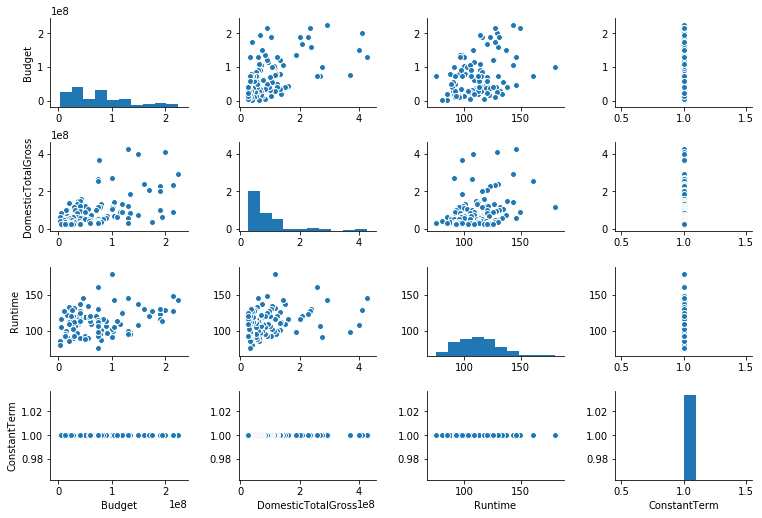

In [65]:
sns.pairplot(df,size = 1.8, aspect=1.5);

In [26]:
df['ConstantTerm']=np.ones([100,1], dtype=int)

In [27]:
df['DomesticTotalGross']=df['DomesticTotalGross'].astype(float)

In [86]:
X=df['ConstantTerm']

# Choose the response variable(s)
y=df['DomesticTotalGross']

In [29]:
#lm1 = smf.ols('y ~ X', data=df, return_type="dataframe")


AttributeError: 'str' object has no attribute 'ndim'

In [87]:
# Create model
model=sm.OLS(y,X)

In [88]:
# Fit your model to your training set
fit=model.fit()
# Print summary statistics of the model's performance
fit.summary()

/Users/pinkyjohar/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Tue, 30 Jan 2018   Prob (F-statistic):                nan
Time:                        14:19:23   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
ConstantTerm  1.006e+08   8.74e+06     11.510      0.000    8.33e+07    1.18e+08
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
predicted_y=fit.predict(X)

In [ ]:
plt.plot(y,predicted_y)
plt.xlabel('Constant ones')
plt.ylabel('DomesticTotalGross')

The graph(straight line) above shows that there is zero or no relation between DomesticTotalGross and constant term.

In [ ]:
fit.resid.plot(style='o', figsize=(12,8));

In [ ]:
fit.resid.hist(bins=20)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
Title                 100 non-null object
Budget                100 non-null float64
DomesticTotalGross    100 non-null float64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
ConstantTerm          100 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.3+ KB


In [ ]:
import math

In [ ]:

lm2=sm.OLS(math.log(y),X)

## Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [30]:
df.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate', 'ConstantTerm'],
      dtype='object')

In [82]:
X1=df[['Budget','ConstantTerm']]
y=df['DomesticTotalGross']

In [83]:
model=sm.OLS(y,X)

In [84]:
fit1=model.fit()

In [85]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     33.18
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           9.69e-08
Time:                        14:18:55   Log-Likelihood:                -1955.4
No. Observations:                 100   AIC:                             3915.
Df Residuals:                      98   BIC:                             3920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Budget           0.7846      0.136      5.760      0.000       0.514       1.055
ConstantTerm  4.195e+07   1.27e+07      3.303      0.001    1.67e+07    6.72e+07
==============================================================================
Omnibus:                       39.855   Durbin-Watson:                   0.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.023
Skew:                           1.547   Prob(JB):                     1.27e-19
Kurtosis:                       6.363   Cond. No.                     1.56e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""